# **COMO USAR?**

# 1. Primeiro, aperte o play (ou shit+enter) nessa célula. Quando terminar de rodar, pode seguir

In [ ]:
!pip install bs4 requests ipython

# 2. Agora, perte o play (ou shit+enter) nessa célula.

# 3. Na hora que você fizer isso, vai aparecer lá embaixo um lugar para colocar o link e o nome da pasta que você quer salvar o seu arquivo

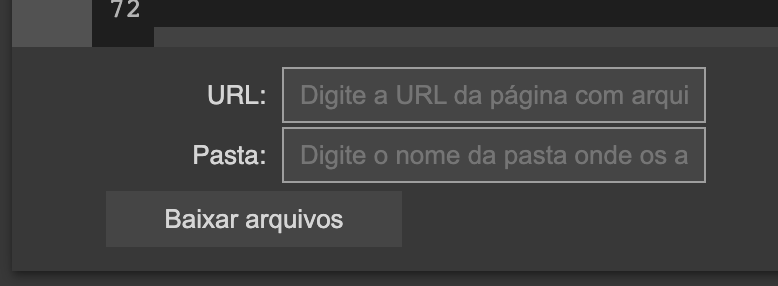

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import ipywidgets as widgets
from IPython.display import display
from urllib.request import urlretrieve


def download_file(url, pasta):
    """Baixe o arquivo e salve-o na pasta especificada."""
    # Crie a pasta se ela não existir
    if not os.path.exists(pasta):
        os.makedirs(pasta)

    # Obtenha a resposta da URL
    response = requests.get(url)
    nome_arquivo = os.path.join(pasta, url.split("/")[-1])

    # Escreva o conteúdo em um arquivo
    with open(nome_arquivo, "wb") as f:
        f.write(response.content)

def download_files(url, pasta):
    """Baixe todos os arquivos vinculados na URL fornecida."""
    # Faça uma solicitação ao site
    response = requests.get(url)
    # Analise a página HTML inteira usando BeautifulSoup
    sopa = BeautifulSoup(response.text, 'html.parser')

    # Encontre todos os links no HTML que começam com o padrão fornecido e terminam com .pdf, .docx, .ppt
    for link in sopa.select('a.aalink[href^="https://edisciplinas.usp.br/mod/resource/view.php"]'):
        # Obtenha o atributo href do link
        url_arquivo = link['href']
        # Faça uma solicitação para o link e obtenha a URL final após os redirecionamentos
        arquivo_response = requests.get(url_arquivo, allow_redirects=True)
        url_final = arquivo_response.url
        # Verifique se a URL final é um link de arquivo
        if url_final and url_final.endswith(('.pdf', '.docx', '.ppt')):
            # Baixe o arquivo
            download_file(url_final, pasta)
            display(f'Arquivo baixado com sucesso: {url_final}\n')

    

# Criação de widgets
input_url = widgets.Text(
    placeholder='Digite a URL da página com arquivos que você deseja baixar',
    description='URL:',
)
display(input_url)

input_folder = widgets.Text(
    placeholder='Digite o nome da pasta onde os arquivos serão salvos',
    description='Pasta:',
)
display(input_folder)

button_download = widgets.Button(
    description='Baixar arquivos',
)
display(button_download)

def on_button_clicked(b):
    # Use case
    url = input_url.value
    pasta = "/content/" + input_folder.value
    if not os.path.exists(pasta):
        os.makedirs(pasta)
    download_files(url, pasta)

button_download.on_click(on_button_clicked)


# Depois de baixar tudo, clica na setinha do lado esquerdo do nome da pasta que você escolheu

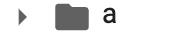

# Para baixar, passa o mouse em cima do nome do arquivo no canto direito. Depois, clica nos 3 pontinhos. Vai aparecer a opção download e é só clicar

 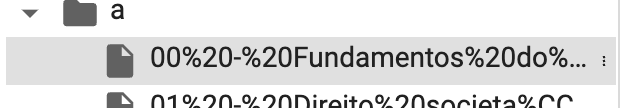


---


 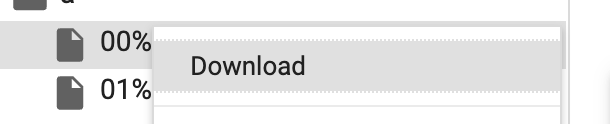